In [1]:
%matplotlib inline
import pylab
import pandas as pd

In [2]:
# Parameters - from when this was a papermill notebook.
sample_id = "SRR606249"
render = ""

In [3]:
from IPython.display import Markdown as md
from IPython.display import display
md(f"# genome-grist report for metagenome `{sample_id}`")

# genome-grist report for metagenome `SRR606249`

## load mapping summary CSVs and gather CSV

In [4]:
# load mapping CSVs
all_df = pd.read_csv(f'inputs/minimap/depth/{sample_id}.summary.csv')
left_df = pd.read_csv(f'inputs/leftover/depth/{sample_id}.summary.csv')

# load gather CSV
gather_df = pd.read_csv(f'inputs/genbank/{sample_id}.x.genbank.gather.csv')

# names!
names_df = pd.read_csv(f'inputs/genbank/{sample_id}.genomes.info.csv')

# connect gather_df to all_df and left_df using 'genome_id'
def fix_name(x):
    return "_".join(x.split('_')[:2]).split('.')[0]

gather_df['genome_id'] = gather_df['name'].apply(fix_name)
names_df['genome_id'] = names_df['acc'].apply(fix_name)

# this ensures that only rows that share genome_id are in all the dataframes
in_gather = set(gather_df.genome_id)
print(f'{len(in_gather)} in gather results')
in_left = set(left_df.genome_id)
print(f'{len(in_left)} in leftover results')

in_both = in_left.intersection(in_gather)
print(f'{len(in_both)} in both')
print('diff gather example:', list(in_gather - in_both)[:5])
print('diff left example:', list(in_left - in_both)[:5])

all_df = all_df[all_df.genome_id.isin(in_both)]
left_df = left_df[left_df.genome_id.isin(in_both)]
gather_df = gather_df[gather_df.genome_id.isin(in_both)]
names_df = names_df[names_df.genome_id.isin(in_both)]

# reassign index now that we've maybe dropped rows
all_df.index = range(len(all_df))
left_df.index = range(len(left_df))
gather_df.index = range(len(gather_df))
names_df.index = range(len(names_df))

assert len(all_df) == len(gather_df)
assert len(left_df) == len(gather_df)
assert len(names_df) == len(gather_df)
assert len(names_df) == len(in_both)

#in_left

# re-sort left_df and all_df to match gather_df order, using matching genome_id column
all_df = all_df.set_index("genome_id")
all_df = all_df.reindex(index=gather_df["genome_id"])
all_df = all_df.reset_index()

left_df = left_df.set_index("genome_id")
left_df = left_df.reindex(index=gather_df["genome_id"])
left_df = left_df.reset_index()

#left_df["mapped_bp"] = (1 - left_df["percent missed"]/100) * left_df["genome bp"]
#left_df["unique_mapped_coverage"] = left_df.coverage / (1 - left_df["percent missed"] / 100.0)

names_df = names_df.set_index("genome_id")
names_df = names_df.reindex(index=gather_df["genome_id"])
names_df = names_df.reset_index()

# subsample? take top N...
NUM=36

left_df = left_df[:NUM]
all_df = all_df[:NUM]
gather_df = gather_df[:NUM]
names_df = names_df[:NUM]

None

73 in gather results
73 in leftover results
73 in both
diff gather example: []
diff left example: []


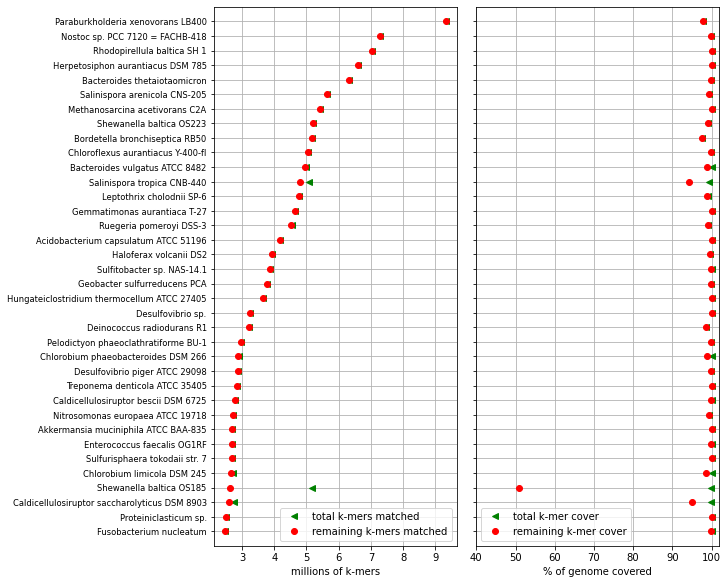

In [5]:

fig, (ax1, ax2) = pylab.subplots(1, 2, figsize=(10, 8), constrained_layout=True)

#pylab.plot(left_df.covered_bp / 1e6, left_df.iloc[::-1].index, 'b.', label='mapped bp to this genome')
ax1.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'g<', label='total k-mers matched')
ax1.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='remaining k-mers matched')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))

ax1.set_yticks(positions)
ax1.set_yticklabels(labels, fontsize='small')

ax1.set_xlabel('millions of k-mers')
ax1.axis(ymin=-1, ymax=NUM)
ax1.legend(loc='lower right')
ax1.grid(True, axis='both')

ax2.plot(gather_df.f_match_orig * 100, gather_df.iloc[::-1].index, 'g<', label='total k-mer cover')
ax2.plot(gather_df.f_match * 100, gather_df.iloc[::-1].index, 'ro', label='remaining k-mer cover')
ax2.set_yticks(positions)
ax2.set_yticklabels([])
ax2.set_xlabel('% of genome covered')
ax2.legend(loc='lower left')
ax2.axis(xmin=40, xmax=102)
ax2.axis(ymin=-1, ymax=NUM)
ax2.grid(True)

#fig.tight_layout()

None
fig.savefig('/tmp/xxx.svg')
# mv /tmp/xxx.svg content/images/gathergram-SRR606249.hashes.svg 


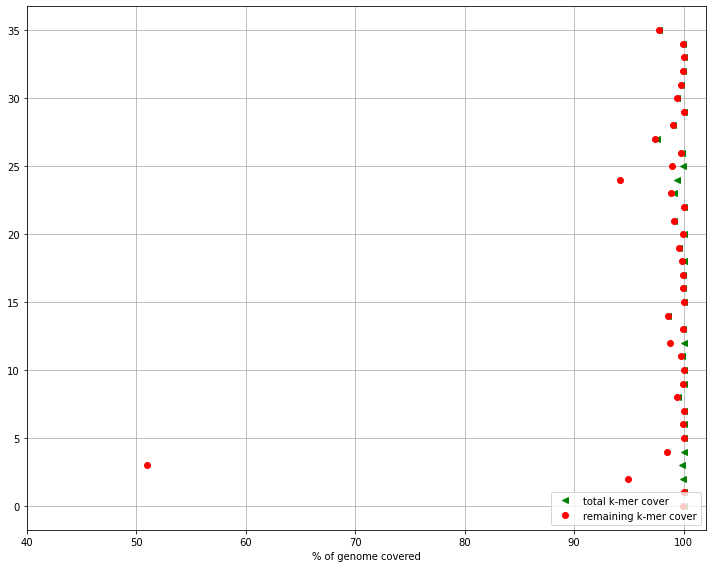

In [6]:
pylab.figure(num=None, figsize=(10, 8))

#left_df['f_covered'] = left_df['covered_bp'] / left_df['genome bp']
pylab.plot(gather_df.f_match_orig * 100, gather_df.iloc[::-1].index, 'g<', label='total k-mer cover')
pylab.plot(gather_df.f_match * 100, gather_df.iloc[::-1].index, 'ro', label='remaining k-mer cover')

#pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
#pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

positions = list(gather_df.index)
#labels = list(reversed(names_df.ncbi_tax_name))
#pylab.yticks(positions, labels, fontsize='small')

pylab.xlabel('% of genome covered')
pylab.legend(loc='lower right')
#pylab.title(f'{sample_id}: % of each genome covered by mapped reads')
pylab.axis(xmin=40, xmax=102)
pylab.grid(True)
pylab.tight_layout()

In [7]:
gather_df

,intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,name,filename,md5,f_match_orig,unique_intersect_bp,gather_result_rank,remaining_bp,query_filename,query_name,query_md5,query_bp,genome_id
0,9323000,0.045444,0.977254,0.045444,0.045444,NaN,NaN,NaN,GCA_000013645.1 Paraburkholderia xenovorans LB...,/home/ctbrown/genome-grist/genbank-db/genbank-...,ee9cb05018009af43429e83e7d502a0a,0.977254,9323000,0,195831000,NaN,SRR606249-known,42df24f0,205154000,GCA_000013645
1,7288000,0.035525,0.999040,0.035525,0.035525,NaN,NaN,NaN,GCA_000009705.1 Nostoc sp. PCC 7120 = FACHB-41...,/home/ctbrown/genome-grist/genbank-db/genbank-...,264cfdad44548ad96c4a24b6a514a877,0.999040,7288000,1,188543000,NaN,SRR606249-known,42df24f0,205154000,GCA_000009705
2,7039000,0.034311,0.999858,0.034311,0.034311,NaN,NaN,NaN,GCA_000196115.1 Rhodopirellula baltica SH 1 st...,/home/ctbrown/genome-grist/genbank-db/genbank-...,7141c3fbf206734950d13cadba0bf46c,0.999858,7039000,2,181504000,NaN,SRR606249-known,42df24f0,205154000,GCA_000196115
3,6604000,0.032190,0.999697,0.032190,0.032190,NaN,NaN,NaN,GCA_000018565.1 Herpetosiphon aurantiacus DSM ...,/home/ctbrown/genome-grist/genbank-db/genbank-...,5165e0f27ae96c8a78da00c2d30a8e36,0.999697,6604000,3,174900000,NaN,SRR606249-known,42df24f0,205154000,GCA_000018565
4,6323000,0.030821,0.997948,0.030821,0.030821,NaN,NaN,NaN,GCA_002959695.1 Bacteroides thetaiotaomicron s...,/home/ctbrown/genome-grist/genbank-db/genbank-...,cefca2cf1f2ffaacdd22d23b45bfb6cb,0.997948,6323000,4,168577000,NaN,SRR606249-known,42df24f0,205154000,GCA_002959695
5,5639000,0.027487,0.993655,0.027482,0.027482,NaN,NaN,NaN,GCA_000018265.1 Salinispora arenicola CNS-205 ...,/home/ctbrown/genome-grist/genbank-db/genbank-...,5519d11c0ae28e167759d1c2b2e1b353,0.993832,5638000,5,162939000,NaN,SRR606249-known,42df24f0,205154000,GCA_000018265
6,5422000,0.026429,0.999816,0.026429,0.026429,NaN,NaN,NaN,GCA_000007345.1 Methanosarcina acetivorans C2A...,/home/ctbrown/genome-grist/genbank-db/genbank-...,56bdd31d168788f6b31dcd0751089a62,0.999816,5422000,6,157517000,NaN,SRR606249-known,42df24f0,205154000,GCA_000007345
7,5188000,0.025288,0.990454,0.025288,0.025288,NaN,NaN,NaN,GCA_000021665.1 Shewanella baltica OS223 strai...,/home/ctbrown/genome-grist/genbank-db/genbank-...,38729c6374925585db28916b82a6f513,0.990454,5188000,7,152329000,NaN,SRR606249-known,42df24f0,205154000,GCA_000021665
8,5174000,0.025220,0.974170,0.025186,0.025186,NaN,NaN,NaN,GCA_000195675.1 Bordetella bronchiseptica RB50...,/home/ctbrown/genome-grist/genbank-db/genbank-...,4d260a2e768d27ef2e2ec65bc61f4a57,0.975490,5167000,8,147162000,NaN,SRR606249-known,42df24f0,205154000,GCA_000195675
9,5054000,0.024635,0.997828,0.024630,0.024630,NaN,NaN,NaN,GCA_000022185.1 Chloroflexus aurantiacus Y-400...,/home/ctbrown/genome-grist/genbank-db/genbank-...,9cb83c551a9bfbc4e3e7f0bdb0e62a31,0.998025,5053000,9,142109000,NaN,SRR606249-known,42df24f0,205154000,GCA_000022185


## fig 2: fraction of hashes unique to query, in order of gather results

Text(0, 0.5, 'f_unique_to_query, as %')

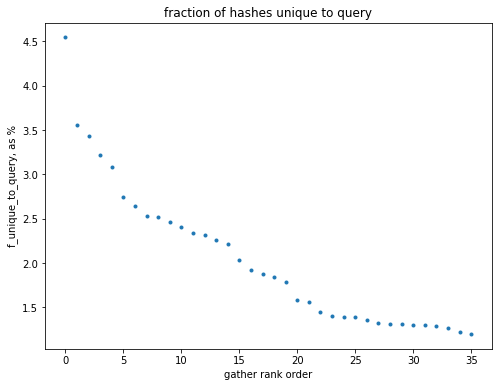

In [8]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(gather_df.index, gather_df["f_unique_to_query"]*100, '.')

pylab.title('fraction of hashes unique to query')
pylab.xlabel('gather rank order')
pylab.ylabel('f_unique_to_query, as %')

## fig 4: sum mapped bp and sum identified hashes, in order of gather

conclusion: across the gather run, total hashes identified correlate well with total bp mapped

Text(0.5, 1.0, 'SRR606249: gather remaining hashes vs remaining bp')

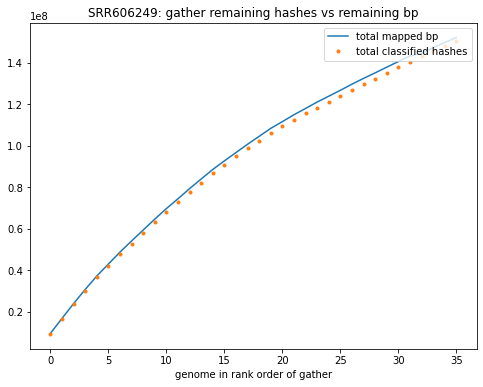

In [9]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(left_df.index, left_df["covered_bp"].cumsum(), '-', label='total mapped bp')
pylab.plot(gather_df.index, gather_df["unique_intersect_bp"].cumsum(), '.', label='total classified hashes')

pylab.xlabel('genome in rank order of gather')
pylab.legend(loc='upper right')
pylab.title(f'{sample_id}: gather remaining hashes vs remaining bp')


## fig 5: mapped bp and identified hashes compared by sample, in order of gather

conclusion: for most samples, bp mapped to that genome matches # of hashes classified to that genome

note: hashes classified to this genome is monotonically decreasing, b/c gather is a greedy algorithm.

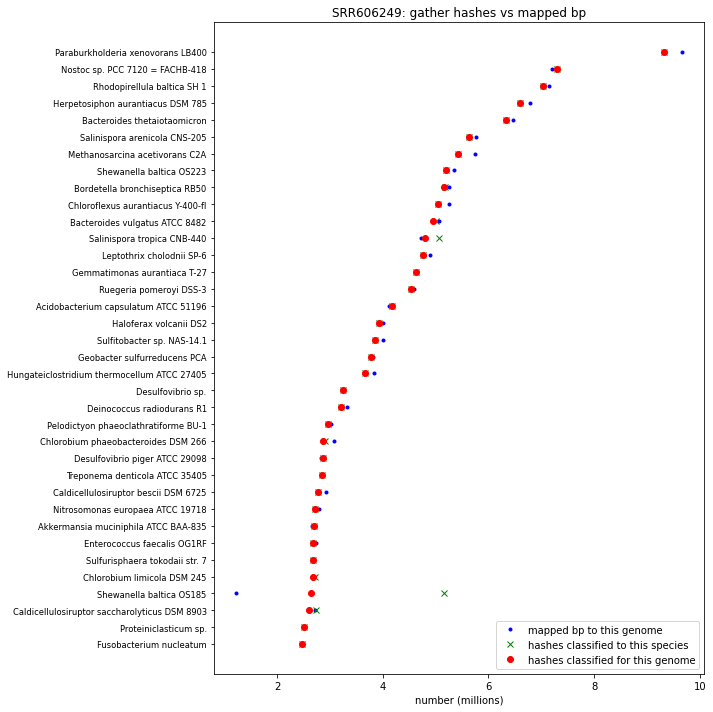

In [10]:
pylab.figure(num=None, figsize=(10, 10))

pylab.plot(left_df.covered_bp / 1e6, left_df.iloc[::-1].index, 'b.', label='mapped bp to this genome')
pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

pylab.xlabel('number (millions)')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: gather hashes vs mapped bp')
pylab.tight_layout()



## fig 6: difference between hashes ident and bp mapped

Text(0, 0.5, 'difference: hashcount - mapped bp')

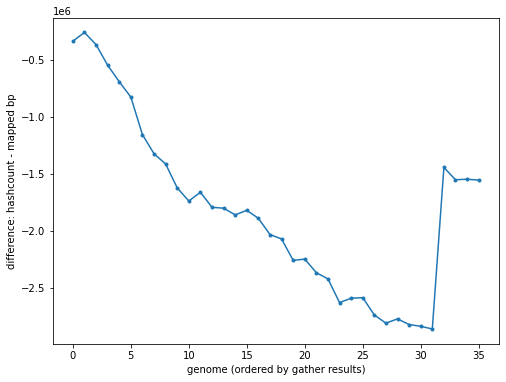

In [11]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(gather_df.index, gather_df.unique_intersect_bp.cumsum() - left_df.covered_bp.cumsum(), '.-')

pylab.xlabel('genome (ordered by gather results)')
pylab.ylabel('difference: hashcount - mapped bp')

## fig 7: difference between hashes and bp, per sample

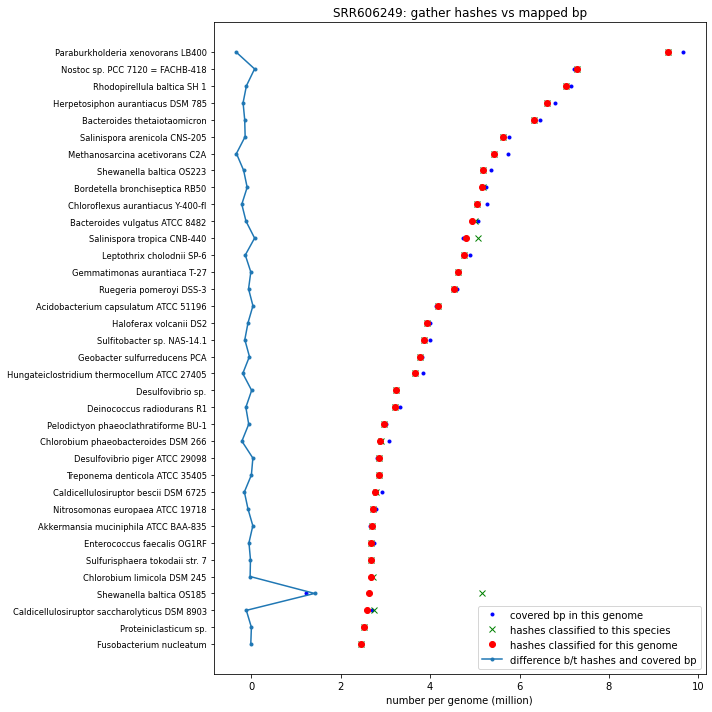

In [12]:
pylab.figure(num=None, figsize=(10, 10))

pylab.plot(left_df.covered_bp / 1e6, left_df.iloc[::-1].index, 'b.', label='covered bp in this genome')
pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

pylab.plot((gather_df.unique_intersect_bp - left_df.covered_bp) / 1e6, gather_df.iloc[::-1].index, 
           '.-', label='difference b/t hashes and covered bp')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

#pylab.ylabel('genome (ordered by gather results)')
pylab.xlabel('number per genome (million)')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: gather hashes vs mapped bp')
pylab.tight_layout()

## fig 8: correlation between hashes and mapping rates

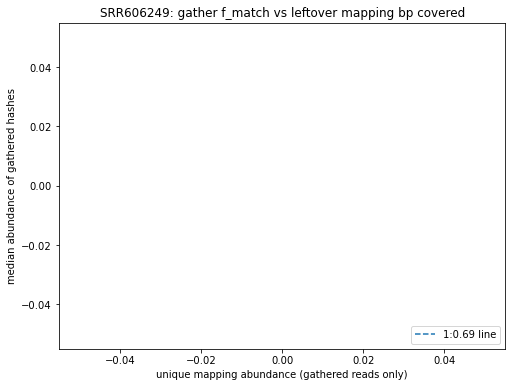

In [13]:
pylab.figure(num=None, figsize=(8, 6))
pylab.plot(left_df.unique_mapped_coverage, gather_df.median_abund, 'ro')
max_x = max(left_df.unique_mapped_coverage)
max_y = max(gather_df.median_abund)
pylab.plot([0, max_x], [0, max_y * 186/270], '--', label="1:0.69 line")
pylab.xlabel('unique mapping abundance (gathered reads only)')
pylab.ylabel('median abundance of gathered hashes')
pylab.title(f'{sample_id}: gather f_match vs leftover mapping bp covered')
pylab.legend(loc='lower right')

## fig 9: percentage of each genome covered by mapped reads

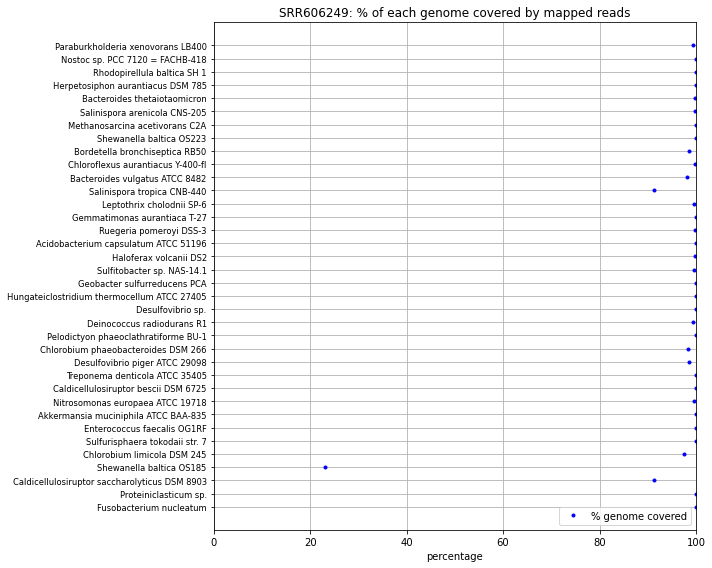

In [14]:
pylab.figure(num=None, figsize=(10, 8))

left_df['f_covered'] = left_df['covered_bp'] / left_df['genome bp']
pylab.plot(left_df.f_covered * 100, left_df.iloc[::-1].index, 'b.', label='% genome covered')
#pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
#pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

pylab.xlabel('percentage')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: % of each genome covered by mapped reads')
pylab.axis(xmin=0, xmax=100)
pylab.grid(True)
pylab.tight_layout()

## fig 10: per-genome coverage estimates from mapped reads

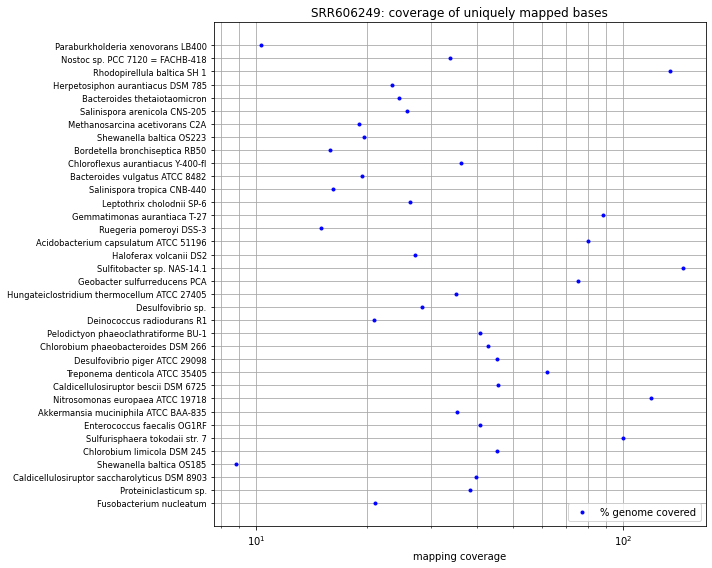

In [15]:
pylab.figure(num=None, figsize=(10, 8))

pylab.plot(left_df.unique_mapped_coverage, left_df.iloc[::-1].index, 'b.', label='% genome covered')
#pylab.plot(gather_df.intersect_bp / 1e6, gather_df.iloc[::-1].index, 'gx', label='hashes classified to this species')
#pylab.plot(gather_df.unique_intersect_bp / 1e6, gather_df.iloc[::-1].index, 'ro', label='hashes classified for this genome')

positions = list(gather_df.index)
labels = list(reversed(names_df.ncbi_tax_name))
pylab.yticks(positions, labels, fontsize='small')

pylab.xlabel('mapping coverage')
pylab.legend(loc='lower right')
pylab.title(f'{sample_id}: coverage of uniquely mapped bases')
#pylab.axis(xmin=0)
pylab.grid(True)
pylab.grid(True, which="both", ls="-", color='0.65')
pylab.xscale('log')
pylab.tight_layout()